# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Joniar Fani Widodo
- Email: jfanniw@gmail.com
- Id Dicoding: weedodo

## Penjelasan Dataset

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren peminjaman sepeda dalam 2 tahun terakhir?
2. Bagaimana karakteristik pemakaian sepeda oleh Pengguna Terdaftar (Registered)?
3. Bagaimana karakteristik pemakaian sepeda oleh Pengguna Umum (Casual)?
4. Bagaimana perbandingan jumlah antara pengguna terdaftar dengan pengguna umum?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Me-mount google drive karena dataset disimpan dalam g-drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Membaca bike sharing dataset
bike_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding Belajar Analisis Data Dengan Python/Bike-sharing-dataset/hour.csv')

# Menampilkan sebagian baris dataset untuk mendapatkan gambaran data
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
# Melihat karakteristik data
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Melakukan pemeriksaan adanya missing values
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari informasi diatas dapat disimpulkan bahwa tidak ditemukan *missing values*

In [6]:
# Cek duplikasi data
bike_data.duplicated().sum()

0

Dari informasi diatas dapat disimpulkan bahwa tidak ditemukan **data duplikat**

### Cleaning Data
Karena tidak ditemukan data yg bermasalah, maka proses pembersihan data tidak dilakukan.

In [7]:
# Tidak dilakukan

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
# Melihat statistik dalam data
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

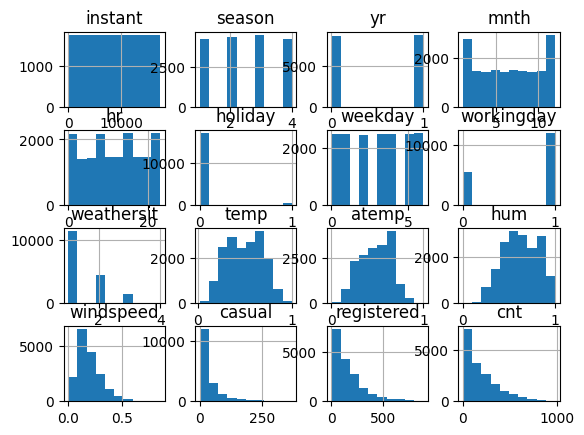

In [9]:
# Memeriksa distribusi data secara cepat
bike_data.hist()

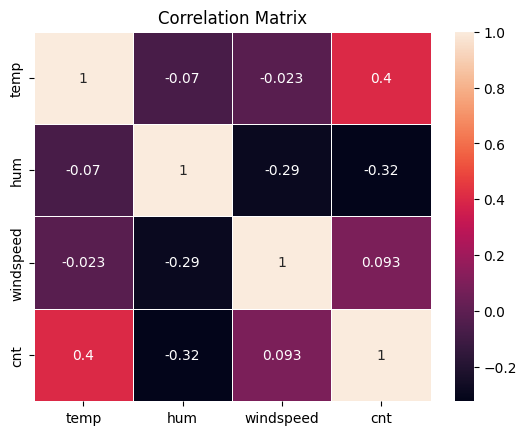

In [10]:
# Memeriksa korelasi data numerik
correlation_matrix = bike_data[['temp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

Berdasarkan nilai korelasi tersebut, kita dapat menyimpulkan pasangan variabel di atas tidak memiliki korelasi karena nilainya mendekati nol (max: 0.4).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda dalam 2 tahun terakhir?

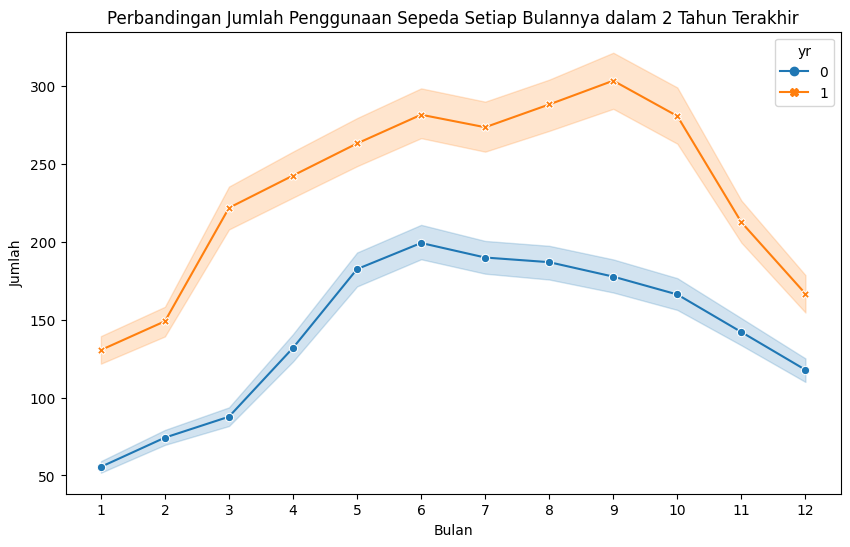

In [11]:
# Gambarkan perbandingan jumlah pemakaian sepeda setiap bulannya dalam 2 tahun terakhir
plt.figure(figsize=(10, 6))
sns.lineplot(data=bike_data, x='mnth', y='cnt', hue='yr', style='yr', markers=True, dashes=False)
plt.title('Perbandingan Jumlah Penggunaan Sepeda Setiap Bulannya dalam 2 Tahun Terakhir')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.xticks(bike_data['mnth'].unique())
plt.show()

Dari data yang diberikan, kita dapat mengambil beberapa kesimpulan dan observasi:

1. **Variasi Musiman:** Terdapat variasi musiman yang jelas dalam penggunaan sepeda di negara dengan 4 musim [Pembagian Musim Wikipedia](https://id.wikipedia.org/wiki/Musim). Hal tersebut terjadi baik pada tahun 2011 maupun 2012, jumlah penggunaan sepeda cenderung meningkat pada musim semi (maret, april, mei) dan musim panas (juni, juli, agustus) dan menurun pada musim gugur (september, oktober, nopember) dan musim dingin (desember, januari, februari).

2. **Tren Tahunan:** Berdasarkan data dapat disimpulkan bahwa ada tren yang meningkat dari tahun 2011 ke tahun 2012. Ini menunjukkan bahwa layanan berbagi sepeda menjadi lebih populer.

3. **Bulan Puncak:** Pada kedua tahun tersebut, bulan-bulan musim panas (Juni, Juli, dan Agustus) secara konsisten menunjukkan jumlah perjalanan sepeda tertinggi. Hal ini bisa disebabkan oleh kondisi cuaca yang mendukung untuk aktivitas luar ruangan selama musim panas, serta faktor pariwisata yang mungkin ada.

4. **Bulan-Bulan Non-Puncak:** Bulan-bulan musim dingin (Desember, Januari, dan Februari) secara konsisten memiliki jumlah perjalanan sepeda yang lebih rendah. Ini dapat disebabkan oleh suhu yang lebih dingin dan kondisi cuaca yang kurang mendukung untuk bersepeda.

Ringkasnya, data ini menunjukkan variasi musiman dalam penggunaan sepeda, dengan jumlah yang lebih tinggi selama bulan yang lebih hangat dan lebih rendah selama bulan yang lebih dingin. Ini juga menunjukkan pertumbuhan keseluruhan dalam penggunaan sepeda dari tahun 2011 ke tahun 2012. Analisis lebih lanjut dan data tambahan dapat memberikan wawasan lebih mendalam tentang faktor-faktor yang mendorong tren ini dan membantu dalam pengambilan keputusan berdasarkan data untuk layanan berbagi sepeda.

### Pertanyaan 2: Bagaimana karakteristik/ pola pemakaian sepeda oleh Pengguna Terdaftar (Registered)?

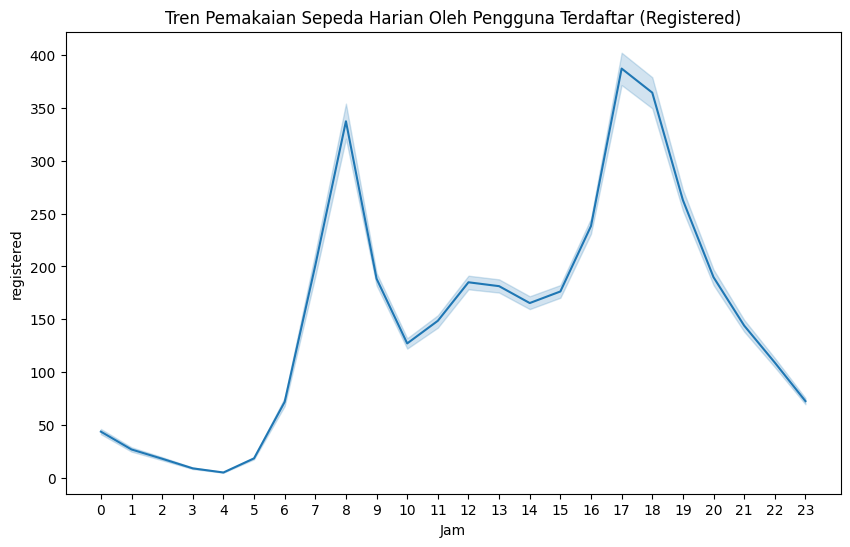

In [12]:
# Grafik Penggunaan Sepeda Harian Untuk Pengguna Terdaftar (Registered)
plt.figure(figsize=(10, 6))
g = sns.lineplot(data=bike_data, x='hr', y='registered')
g.set(title='Tren Pemakaian Sepeda Harian Oleh Pengguna Terdaftar (Registered)')
g.set(xlabel='Jam')
g.set(xticks=bike_data['hr'].unique())
plt.show()

Data yang diberikan adalah ringkasan penggunaan layanan oleh pengguna yang terdaftar (anggota) selama periode tertentu dalam sehari, diukur dalam jumlah pengguna yang terdaftar yang menggunakan layanan pada setiap jam tertentu.

Dari data ini, kita dapat membuat beberapa kesimpulan:

1. **Puncak Penggunaan:** Puncak penggunaan oleh pengguna terdaftar terjadi pada jam 17 (5:00 PM) dengan total 282.640 pengguna terdaftar yang menggunakan layanan pada saat itu. Ini adalah salah satu jam dengan penggunaan tertinggi oleh pengguna terdaftar.

2. **Jam Sibuk Lainnya:** Jam-jam lain yang juga terlihat sibuk adalah jam 8 (8:00 AM) dengan 245.240 pengguna terdaftar dan jam 18 (6:00 PM) dengan 265.276 pengguna terdaftar. Ini mungkin mencerminkan saat-saat berangkat kerja dan kembali dari kerja.

3. **Jam Pagi:** Pengguna terdaftar cenderung mulai aktif pada jam-jam pagi, mulai dari jam 6 (6:00 AM) hingga jam 8 (8:00 AM). Peningkatan signifikan terjadi pada jam 8 (8:00 AM).

4. **Jam Sepi:** Seperti data sebelumnya, jam-jam dini hari (misalnya, jam 2, 3, 4) memiliki jumlah pengguna terdaftar yang lebih rendah, mencapai titik terendah pada jam 4 dengan 3.554 pengguna terdaftar. Ini adalah waktu ketika sebagian besar orang tidur.

5. **Variasi Seiring Waktu:** Data ini mencerminkan variasi penggunaan layanan sepeda oleh pengguna terdaftar selama hari, dengan puncak pada beberapa jam tertentu dan penurunan di jam lainnya. Informasi ini dapat berguna dalam perencanaan operasional, alokasi sumber daya, dan analisis tren seiring waktu.

6. **Potensi Analisis Lanjutan:** Data ini juga dapat digunakan untuk menganalisis tren harian dan mingguan dalam penggunaan layanan oleh pengguna terdaftar, memahami preferensi waktu dari pengguna terdaftar, dan menentukan waktu operasi yang optimal untuk layanan berdasarkan permintaan pelanggan.

Data ini memberikan wawasan tentang pola penggunaan harian dari pengguna terdaftar layanan bersepeda, yang dapat berguna dalam pengambilan keputusan terkait dengan manajemen sumber daya dan perencanaan layanan.

### Pertanyaan 3: Bagaimana karakteristik/ pola pemakaian sepeda oleh Pengguna Umum (Casual)?

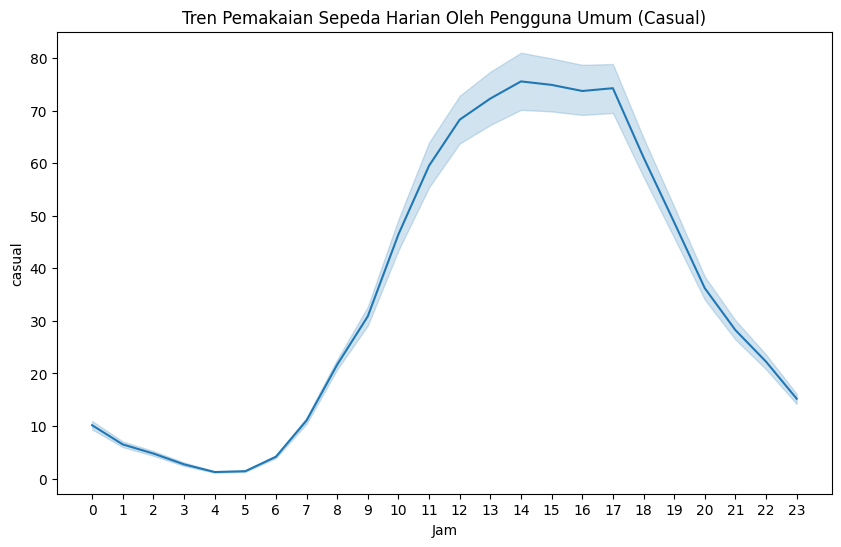

In [13]:
# Grafik Penggunaan Sepeda Harian Untuk Pengguna Umum (Casual)
plt.figure(figsize=(10, 6))
g = sns.lineplot(data=bike_data, x='hr', y='casual')
g.set(title='Tren Pemakaian Sepeda Harian Oleh Pengguna Umum (Casual)')
g.set(xlabel='Jam')
g.set(xticks=bike_data['hr'].unique())
plt.show()

Data yang diberikan adalah ringkasan penggunaan layanan oleh pengguna casual (non-anggota atau pengguna satu kali) selama periode tertentu dalam sehari, diukur dalam jumlah pengguna casual yang menggunakan layanan pada setiap jam tertentu.

Dari data ini, kita dapat membuat beberapa kesimpulan:

1. **Puncak Penggunaan:** Puncak penggunaan oleh pengguna casual terjadi pada jam 14 (2:00 PM) dengan total 55.089 pengguna casual yang menggunakan layanan pada saat itu. Ini adalah salah satu jam dengan penggunaan tertinggi oleh pengguna casual.

2. **Jam Sibuk Lainnya:** Jam-jam lain yang juga terlihat sibuk adalah jam 16 (4:00 PM) hingga jam 17 (5:00 PM), dengan jumlah pengguna casual yang cukup tinggi. Ini mungkin mencerminkan aktivitas rekreasi sore hari atau perjalanan pulang.

3. **Jam Pagi:** Pengguna casual biasanya mulai aktif pada jam-jam pagi, mulai dari jam 6 (6:00 AM) hingga jam 9 (9:00 AM). Peningkatan signifikan terjadi setelah jam 8 (8:00 AM) dengan 15.761 pengguna casual pada jam tersebut.

4. **Jam Sepi:** Seperti data sebelumnya, jam-jam dini hari (misalnya, jam 2, 3, 4, 5) memiliki jumlah pengguna casual yang lebih rendah, mencapai titik terendah pada jam 4 dengan 874 pengguna casual. Ini adalah waktu ketika sebagian besar orang tidur.

5. **Variasi Seiring Waktu:** Data ini mencerminkan variasi penggunaan layanan sepeda oleh pengguna casual selama hari, dengan puncak pada beberapa jam tertentu dan penurunan di jam lainnya. Informasi ini dapat berguna dalam perencanaan operasional, alokasi sumber daya, dan analisis tren seiring waktu.

6. **Potensi Analisis Lanjutan:** Data ini juga dapat digunakan untuk menganalisis tren harian dan mingguan dalam penggunaan layanan oleh pengguna casual, memahami preferensi waktu dari pengguna casual, dan menentukan waktu operasi yang optimal untuk layanan berdasarkan permintaan pelanggan.

Data ini memberikan wawasan tentang pola penggunaan harian dari pengguna casual layanan bersepeda, yang dapat berguna dalam pengambilan keputusan terkait dengan manajemen sumber daya dan perencanaan layanan.

### Pertanyaan 4: Bagaimana perbandingan jumlah antara pengguna terdaftar dengan pengguna umum?

[]

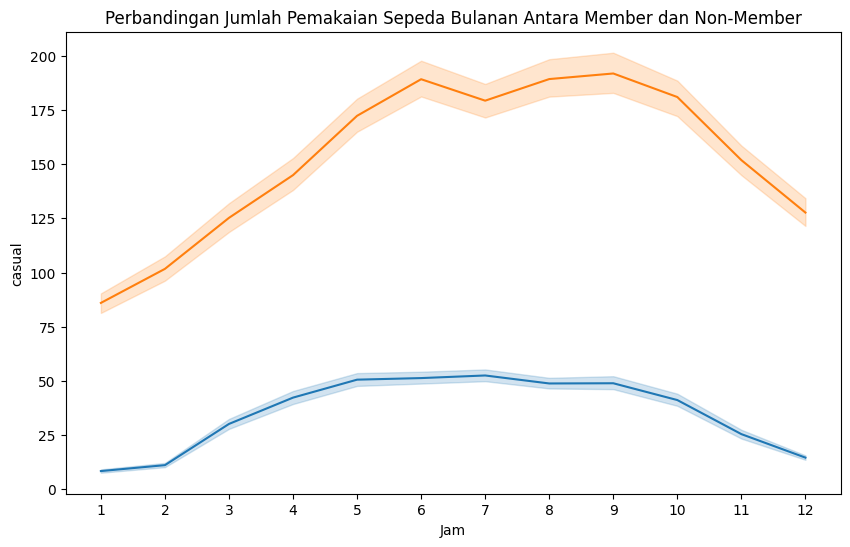

In [14]:
# Gambarkan perbandingan jumlah pemakaian sepeda bulanan antara pengguna casual dan registered
plt.figure(figsize=(10, 6))
g1 = sns.lineplot(data=bike_data, x='mnth', y='casual')
g1 = sns.lineplot(data=bike_data, x='mnth', y='registered')
g1.set(title='Perbandingan Jumlah Pemakaian Sepeda Bulanan Antara Member dan Non-Member')
g1.set(xlabel="Jam")
g1.set(xticks=bike_data['hr'].unique())
plt.plot()

Data yang diberikan adalah ringkasan penggunaan layanan bersepeda selama 12 bulan dalam setahun, dengan pemisahan antara pengguna casual (pengguna umum) dan pengguna terdaftar (anggota yang telah mendaftar). Dari data ini, kita dapat membuat beberapa observasi dan kesimpulan bahwa Pengguna terdaftar (anggota) cenderung menjadi kontributor utama dalam penggunaan layanan sepanjang tahun. Meskipun ada fluktuasi bulanan, jumlah pengguna terdaftar secara konsisten tinggi. Hal tersebut menunjukkan bahwa pelanggan memiliki tingkat loyalitas yang tinggi terhadap penyedia jasa *bike sharing*.

# Conclusion

Dari data yang diberikan, perbedaan antara pengguna terdaftar (registered) dan pengguna casual dalam konteks penggunaan layanan bersepeda (bike-sharing service) adalah sebagai berikut:

1. **Jumlah Penggunaan Harian:**
   - **Pengguna Terdaftar:** Pengguna terdaftar cenderung menggunakan layanan secara konsisten sepanjang hari dengan tingkat penggunaan yang relatif stabil dari jam ke jam. Puncak penggunaan terjadi di jam-jam berangkat dan pulang kerja.
   - **Pengguna Casual:** Pengguna casual memiliki pola penggunaan yang lebih bervariasi. Jumlah penggunaan mereka meningkat secara signifikan selama jam sibuk di tengah hari, terutama di sekitar jam 14 (2:00 PM) hingga jam 17 (5:00 PM). Mereka mungkin menggunakan layanan untuk aktivitas rekreasi atau wisata.

2. **Puncak Penggunaan:**
   - **Pengguna Terdaftar:** Puncak penggunaan oleh pengguna terdaftar terjadi pada jam 17 (5:00 PM) dengan total 282.640 pengguna terdaftar yang menggunakan layanan pada saat itu.
   - **Pengguna Casual:** Puncak penggunaan oleh pengguna casual terjadi pada jam 14 (2:00 PM) dengan total 55.089 pengguna casual yang menggunakan layanan pada saat itu. Ini adalah salah satu jam dengan penggunaan tertinggi oleh pengguna casual.

3. **Perbedaan Penggunaan di Jam Pagi:**
   - **Pengguna Terdaftar:** Pengguna terdaftar memiliki penggunaan yang relatif tinggi di pagi hari, terutama di jam 8 (8:00 AM) dengan 245.240 pengguna terdaftar.
   - **Pengguna Casual:** Pengguna casual cenderung memiliki penggunaan yang lebih rendah di pagi hari, dan peningkatan penggunaan yang signifikan dimulai di jam 10 (10:00 AM).

4. **Perbedaan Jam Malam dan Dini Hari:**
   - **Pengguna Terdaftar:** Pengguna terdaftar masih memiliki penggunaan yang signifikan di jam-jam malam dan dini hari, dengan penggunaan tertinggi di jam 17 (5:00 PM).
   - **Pengguna Casual:** Pengguna casual memiliki penggunaan yang lebih rendah di jam-jam dini hari, mencapai titik terendah pada jam 4 (4:00 AM).

5. **Pola Tren Harian yang Berbeda:** Pola penggunaan harian antara pengguna terdaftar dan pengguna casual sangat berbeda. Pengguna terdaftar cenderung memiliki pola penggunaan yang lebih stabil sepanjang hari, sementara pengguna casual memiliki fluktuasi yang lebih besar dengan puncak penggunaan di tengah hari.

Perbedaan dalam pola penggunaan ini dapat memberikan wawasan tentang preferensi dan kebiasaan pengguna terdaftar dan casual. Pengguna terdaftar mungkin lebih cenderung menggunakan layanan bersepeda untuk keperluan sehari-hari seperti berangkat ke kantor dan pulang kantor, sementara pengguna casual mungkin lebih mengutamakan penggunaan rekreasi atau aktivitas di luar ruangan selama jam-jam tertentu. Perbedaan ini dapat digunakan untuk mengarahkan strategi pemasaran, perencanaan sumber daya, dan peningkatan layanan yang lebih tepat sasaran bagi masing-masing kelompok pengguna.

# Rekomendasi

1. Perusahaan Melakukan Promosi Selama Musim Dingin: Berdasarkan data diperoleh bahwasanya terjadi penurunan penggunaan pada musim-musim dingin maka direkomendasikan untuk meluncurkan program promosi khusus atau diskon bagi pengguna terdaftar dan casual. Ini dapat mencakup penawaran spesial untuk penggunaan di bulan-bulan dengan cuaca dingin atau program hadiah untuk merangsang aktivitas bersepeda.

2. Program Keanggotaan Baru: Selain adanya pengguna yg telah terdaftar, diketahui bahwasanya ada potensi yang dapat ditindaklanjuti oleh perusahaan, yaitu adanya pengguna yg belum menjadi member. Untuk menarik minat pengguna tersebut, mungkin dapat pertimbangkan untuk memperkenalkan program keanggotaan yang menarik, dengan manfaat seperti diskon, penawaran khusus, atau akses eksklusif selama musim tinggi.

3. Merencanakan Sumberdaya Lebih: Berdasarkan pola penggunaan harian diperoleh bahwasanya ada jam-jam tertentu dimana penggunaan sepeda sangat tinggi, untuk kondisi ini dapat dipertimbangkan untuk menyiapkan persedian sepeda yang lebih agar pelanggan tidak merasa kesulitan untuk mendapatkan sumber daya.

4. Merencanakan Perawatan: Selain adanya puncak pemakaian, diketahui juga ada waktu-waktu tertentu dimana pemakaian turun. Hal ini dapat dimanfaatkan oleh perusahaan untuk melakukan perawatan terhadap sepeda, sehingga tidak mengganggu pelanggan yang akan mengggunakan sepeda tersebut.